### Welcome to the Dataco Supply Chain Study | Capstone 2.

I'm using Python's plotting and modelling libraries for this study:
**Descriptive Statistics first followed by Inferential Statistics.**  

<H3>  Time to get started! </H3>

In [838]:
#Import the Python libraries needed to complete the analysis
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [839]:
# Import the dataset
dataframe = pd.read_csv("DataCoSupplyChainDataset.csv",encoding='ISO-8859-1') # error of UTF-8
#utf-8 code error usually comes when the range of numeric values exceeding 0 to 127, 
#the Unicode string can’t be represented in this encoding
#to overcome this there is a set of encodings, the most widely used is "Latin-1, also known as ISO-8859-1


## <span style="color:blue">Data cleansing</span>


In [717]:
print("\nDESCRIPTIVE STATISTICS FOR DataCoSupplyChainDataset")
display(dataframe.describe())
display(dataframe.info())
dataframe.shape


DESCRIPTIVE STATISTICS FOR DataCoSupplyChainDataset


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

None

(180519, 53)

In [232]:
dataframe.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [384]:
#Converting categorical date and time to datetime datatype
dataframe["shipping_date_dateorders"] = pd.to_datetime(dataframe["shipping date (DateOrders)"])
dataframe['order_date_dateorders'] = pd.to_datetime(dataframe['order date (DateOrders)'])


# Create year, month, day variables
dataframe["shipping_year"] = dataframe["shipping_date_dateorders"].dt.year
dataframe['shipping_month'] = dataframe["shipping_date_dateorders"].dt.month_name()
dataframe["shipping_day"] = dataframe["shipping_date_dateorders"].dt.day_name()
dataframe["shipping_hour"] = dataframe["shipping_date_dateorders"].dt.hour

dataframe["order_year"] = dataframe["order_date_dateorders"].dt.year
dataframe['order_month'] = dataframe["order_date_dateorders"].dt.month
dataframe["order_day"] = dataframe["order_date_dateorders"].dt.day_name()
dataframe["order_hour"] = dataframe["order_date_dateorders"].dt.hour

dataframe["late_days"] = dataframe["Days for shipping (real)"] - dataframe["Days for shipment (scheduled)"]

dataframe.head()

#dataframe=dataframe.drop(['shipping date (DateOrders)','order date (DateOrders)','order_date_dateorders','shipping_date_dateorders'], axis=1)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,shipping_year,shipping_day,shipping_hour,late_days,order_date_dateorders,shipping_month,order_year,order_month,order_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,2018,Saturday,22,-1,2018-01-31 22:56:00,February,2018,1,Wednesday,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,2018,Thursday,12,1,2018-01-13 12:27:00,January,2018,1,Saturday,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,2018,Wednesday,12,0,2018-01-13 12:06:00,January,2018,1,Saturday,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,2018,Tuesday,11,-1,2018-01-13 11:45:00,January,2018,1,Saturday,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,2018,Monday,11,-2,2018-01-13 11:24:00,January,2018,1,Saturday,11


<h3>Now we know that late delivery are what we want to analyse. First we need to get an understanding of how many late delivery we are dealing with before then drilling down into where the largest late delivery are occuring geographically and when. From this we then decided to drill down to the store department and then subsequently the products that were most frequently late. This is outlined in the Issue Tree I've provided below that highlighted my thinking. 
From there, a model will be built to try to predict a late delivery.</h3>


## <span style="color:blue">Descriptive Statistics</span>



<span style="color:blue">-> HOW MANY?</span>

<span style="color:blue">1- How many late delivery?</span>


In [234]:
dataframe1=dataframe["Delivery Status"].value_counts()
dataframe1

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

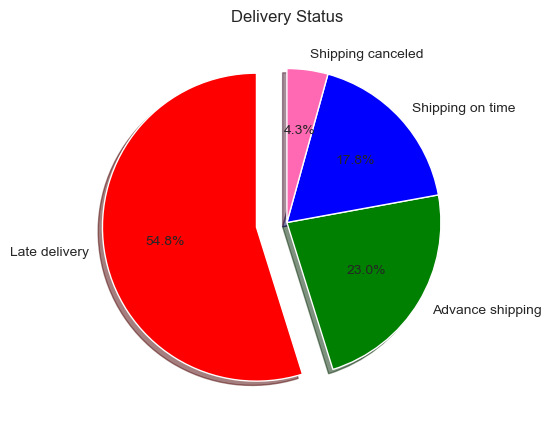

In [235]:
mylabels=["Late delivery","Advance shipping","Shipping on time","Shipping canceled"]
mycolors=["red", "green", "blue", "hotpink"]
plt.pie(dataframe1, labels=mylabels, colors=mycolors, explode = [0.2,0,0,0], 
                    startangle = 90, shadow = True, autopct='%1.1f%%')
plt.title("Delivery Status")
plt.show() 


<span style="color:blue">1.1- How many late delivery per Shipping mode?</span>

In [236]:
dataframe2=dataframe["Shipping Mode"].value_counts()
display(dataframe2)

total = dataframe.groupby("Shipping Mode").agg(count = ("Shipping Mode", "count"))
#Calculation Percentage
tot=total["count"].sum()
total["percentage"]=0
l=[]
for i in total["count"]:
    l.append(round(i/tot *100, 1))
total["percentage"]=l
display(total)

dataframe3=dataframe.groupby(["Shipping Mode","Delivery Status"])["Order Id"].count()
display(dataframe3)

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

,count,percentage
Shipping Mode,,
First Class,27814,15.4
Same Day,9737,5.4
Second Class,35216,19.5
Standard Class,107752,59.7


Shipping Mode   Delivery Status  
First Class     Late delivery        26513
                Shipping canceled     1301
Same Day        Late delivery         4454
                Shipping canceled      444
                Shipping on time      4839
Second Class    Late delivery        26987
                Shipping canceled     1410
                Shipping on time      6819
Standard Class  Advance shipping     41592
                Late delivery        41023
                Shipping canceled     4599
                Shipping on time     20538
Name: Order Id, dtype: int64

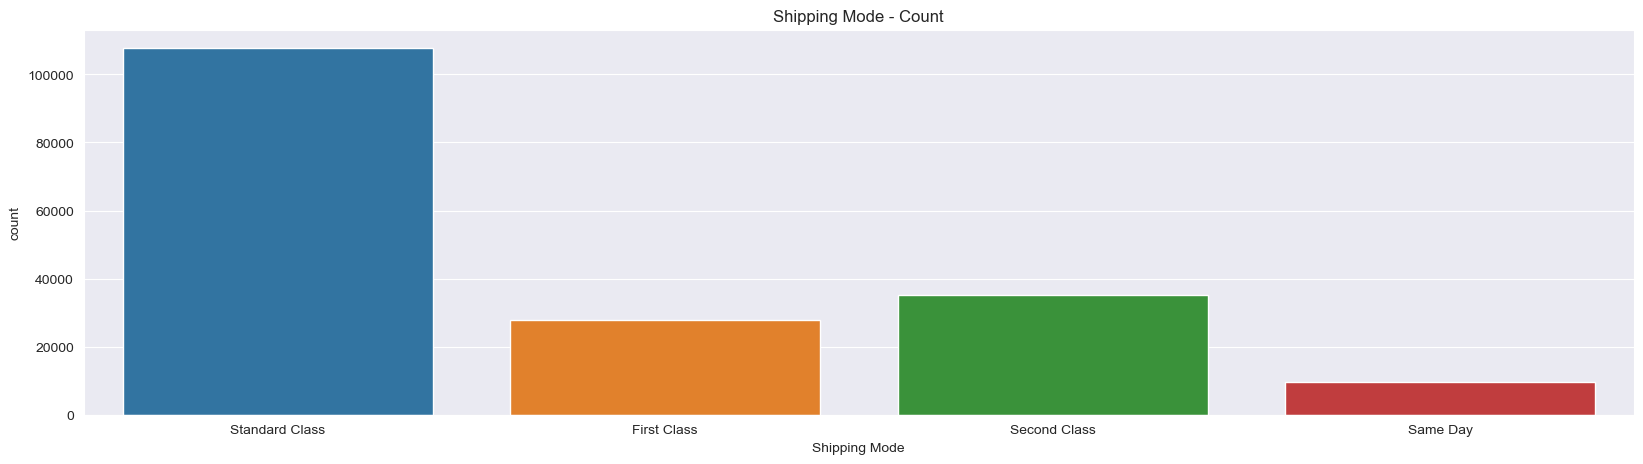

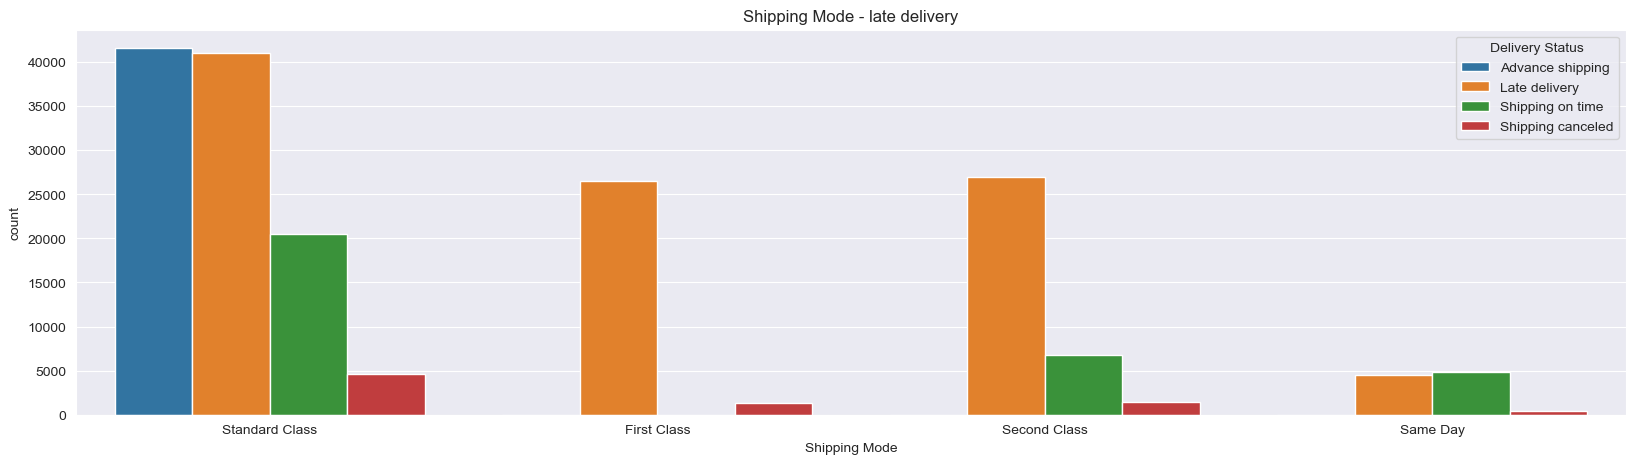

In [237]:
sns.countplot(x="Shipping Mode", data=dataframe)
plt.title("Shipping Mode - Count")
plt.show()

sns.countplot(x="Shipping Mode", data=dataframe, hue="Delivery Status")
plt.title("Shipping Mode - late delivery")
plt.show()



<r><span style="color:red"> INSIGHTS:   </span>
Standard Class is the majority of shipping mode among the others, while Same Day shipping mode only shares a small portion. Customers tend to use the shipping method with a lower price. 
But, in Standard Class there are as many Late Delivery as Advance shipping and almost all orders of First Class shipping mode are late delivery.



<span style="color:blue">1.2- How many late delivery per Type of payment?</span>

In [238]:
dataframe4=dataframe.groupby(["Type","Delivery Status"])["Order Id"].count()
display(dataframe4)


Type      Delivery Status  
CASH      Advance shipping      4809
          Late delivery        11109
          Shipping on time      3698
DEBIT     Advance shipping     16549
          Late delivery        39649
          Shipping on time     13097
PAYMENT   Advance shipping     10008
          Late delivery        24004
          Shipping on time      7713
TRANSFER  Advance shipping     10226
          Late delivery        24215
          Shipping canceled     7754
          Shipping on time      7688
Name: Order Id, dtype: int64

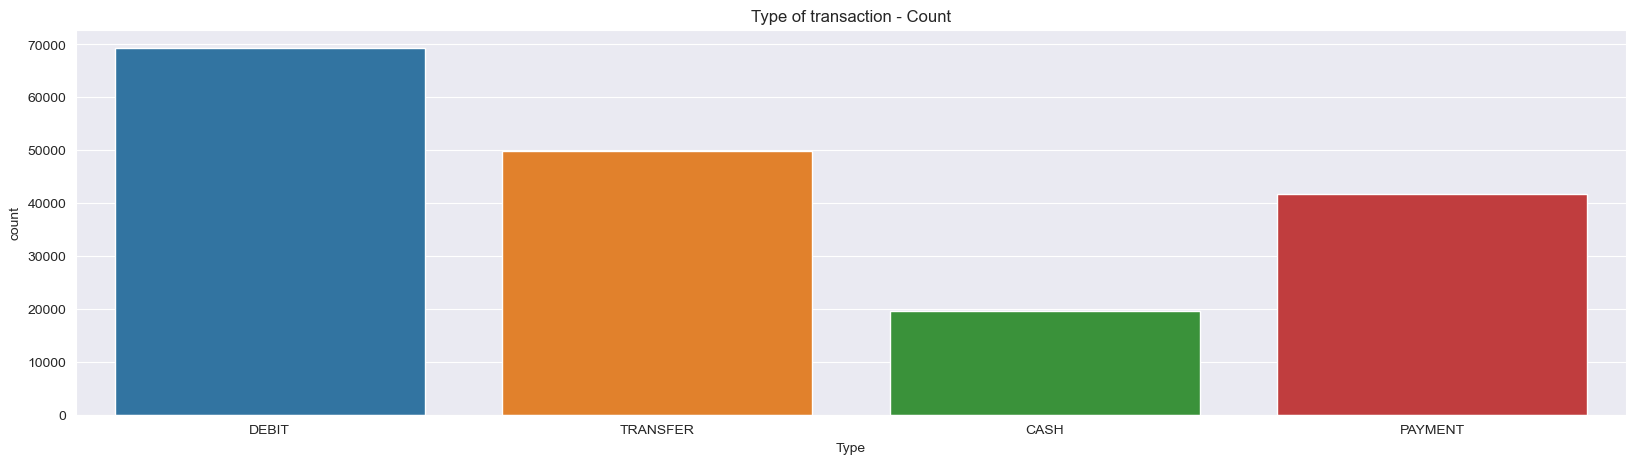

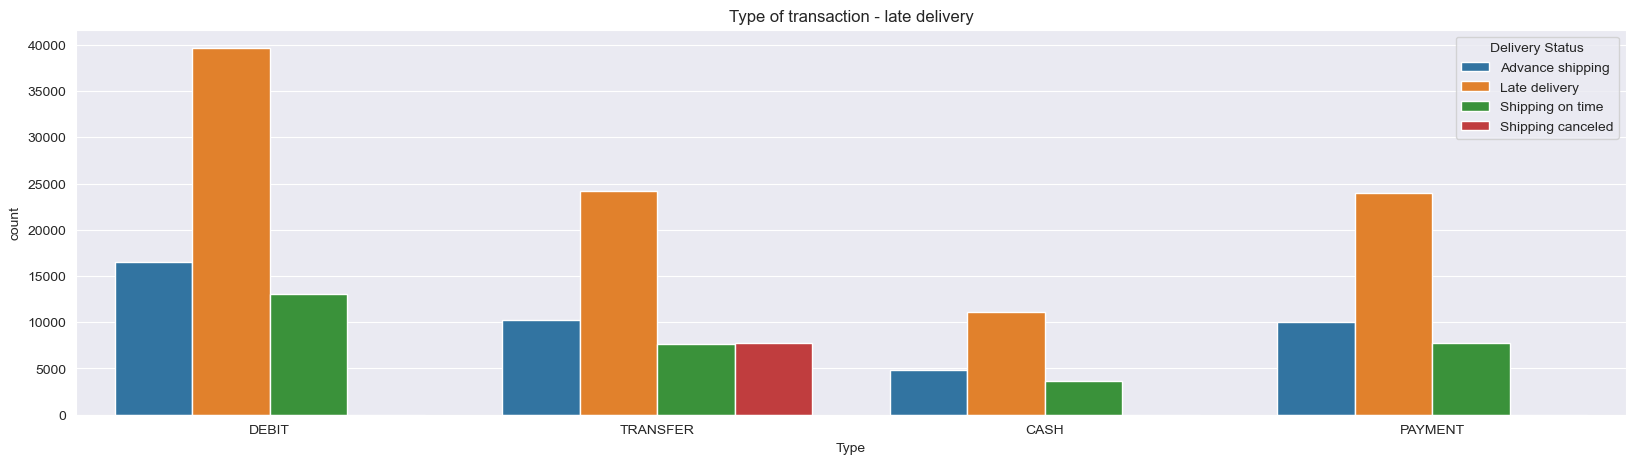

In [239]:
sns.countplot(x="Type", data=dataframe)
plt.title("Type of transaction - Count")
plt.show()

sns.countplot(x="Type", data=dataframe, hue="Delivery Status")
plt.title("Type of transaction - late delivery")
plt.show()



<r><span style="color:red"> INSIGHTS:   </span>
Debit is the majority of transaction among the others, while cash only shares a small portion.
There are many Late Delivery for all type of transaction.

<span style="color:blue">1.3- How many late delivery per Order Status?</span>

In [240]:
dataframe5=dataframe.groupby(["Order Status","Delivery Status"])["Order Id"].count()
display(dataframe5)

Order Status     Delivery Status  
CANCELED         Shipping canceled     3692
CLOSED           Advance shipping      4809
                 Late delivery        11109
                 Shipping on time      3698
COMPLETE         Advance shipping     14136
                 Late delivery        34199
                 Shipping on time     11156
ON_HOLD          Advance shipping      2413
                 Late delivery         5450
                 Shipping on time      1941
PAYMENT_REVIEW   Advance shipping       420
                 Late delivery         1082
                 Shipping on time       391
PENDING          Advance shipping      4857
                 Late delivery        11712
                 Shipping on time      3658
PENDING_PAYMENT  Advance shipping      9588
                 Late delivery        22922
                 Shipping on time      7322
PROCESSING       Advance shipping      5369
                 Late delivery        12503
                 Shipping on time      40

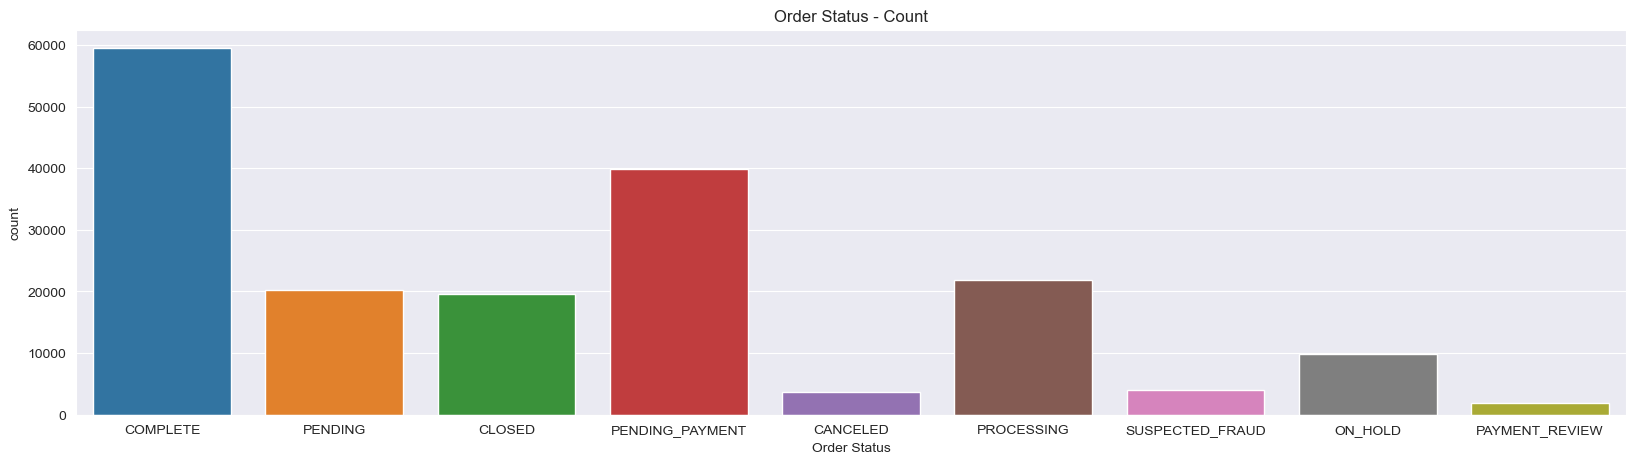

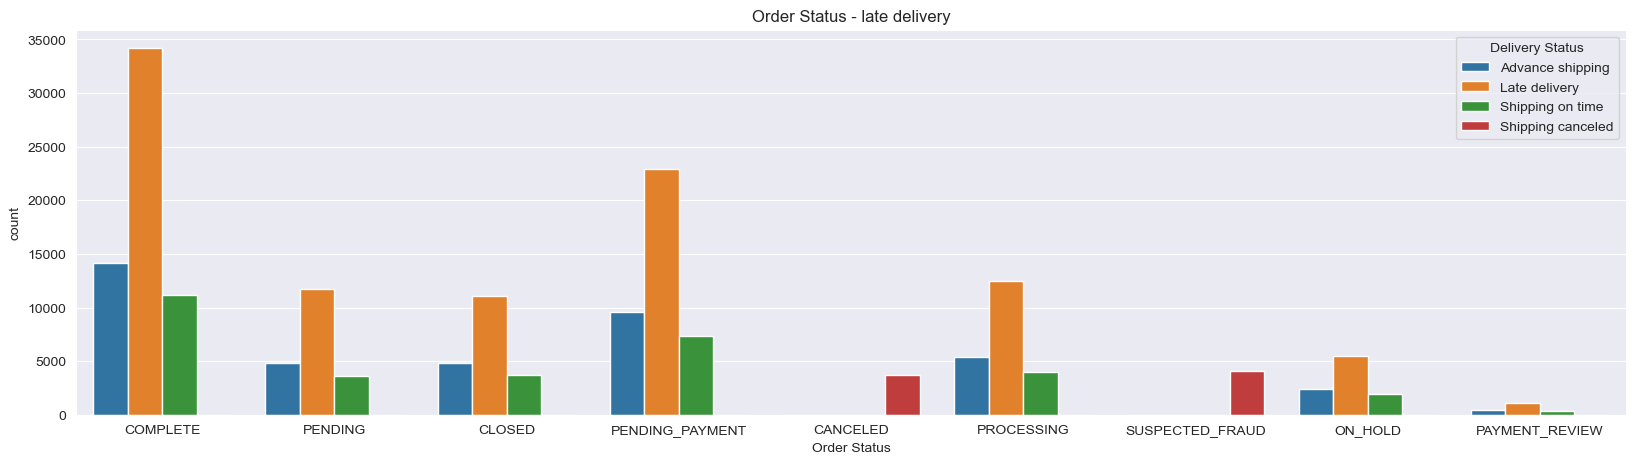

In [241]:
sns.countplot(x="Order Status", data=dataframe)
plt.title("Order Status - Count")
plt.show()

sns.countplot(x="Order Status", data=dataframe, hue="Delivery Status")
plt.title("Order Status - late delivery")
plt.show()

<r><span style="color:red"> INSIGHTS:   </span>
Complete orders have two times more Late delivery than Advance shipping.

<span style="color:blue">1.4- How many late delivery per Customer segment?</span>

In [242]:
dataframe6=dataframe.groupby(["Customer Segment","Delivery Status"])["Order Id"].count()
display(dataframe6)

Customer Segment  Delivery Status  
Consumer          Advance shipping     21388
                  Late delivery        51248
                  Shipping canceled     4084
                  Shipping on time     16784
Corporate         Advance shipping     12856
                  Late delivery        29982
                  Shipping canceled     2261
                  Shipping on time      9690
Home Office       Advance shipping      7348
                  Late delivery        17747
                  Shipping canceled     1409
                  Shipping on time      5722
Name: Order Id, dtype: int64

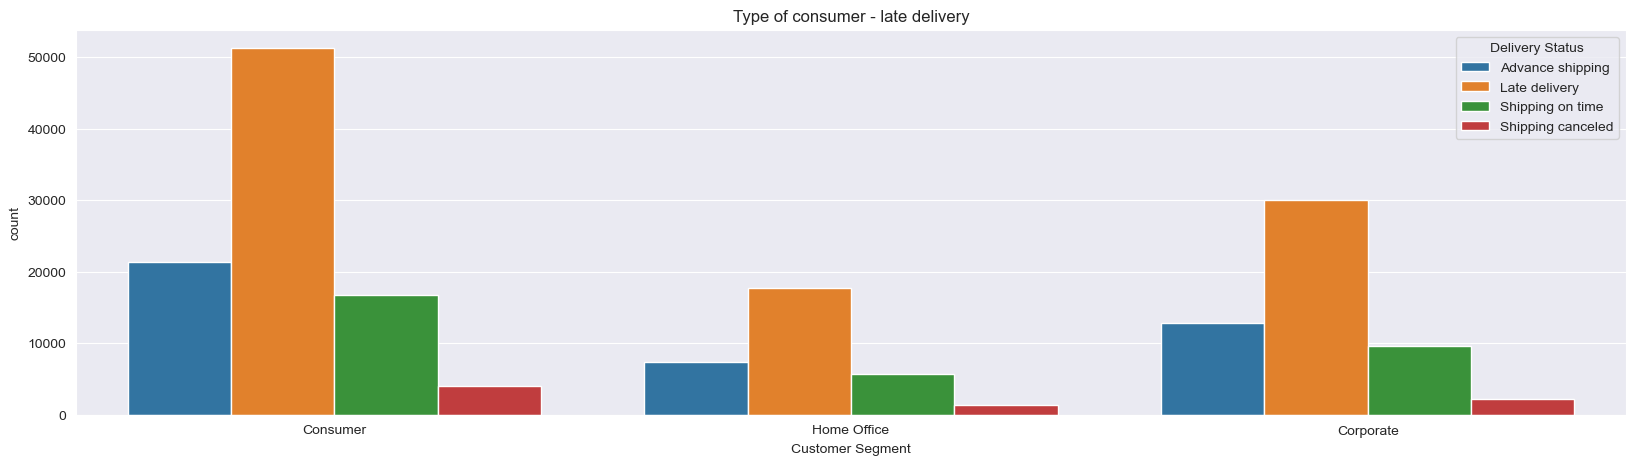

In [243]:
sns.countplot(x="Customer Segment", data=dataframe, hue="Delivery Status")
plt.title("Type of consumer - late delivery")
plt.show()


<span style="color:blue">-> WHEN?</span>

<span style="color:blue">2.1- How many more days for a late delivery?</span>

,Delivery Status,number,actual_days_for_shipping,scheduled_days_for_shipping,late_days
0,Advance shipping,41592,2.498149,4.000000,-1.501851
1,Late delivery,98977,4.089253,2.471069,1.618184
2,Shipping canceled,7754,3.476657,2.903921,0.572737
3,Shipping on time,32196,2.975214,2.975214,0.000000


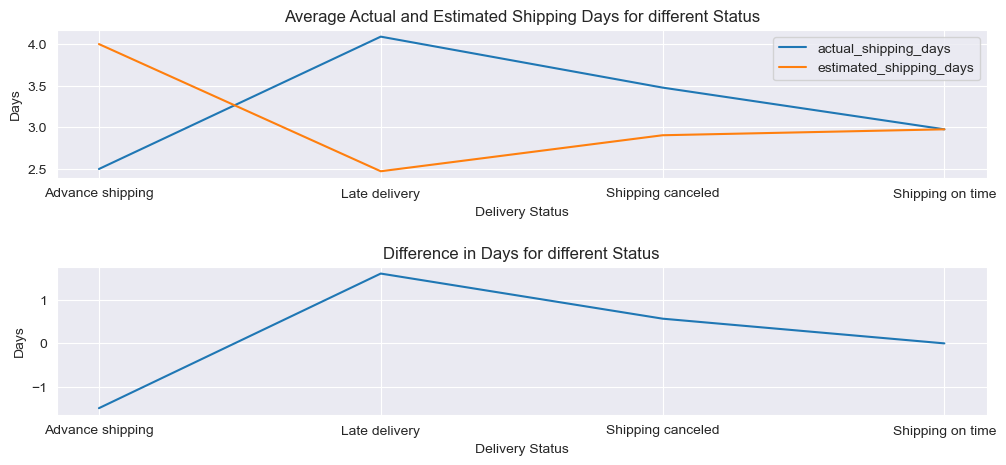

In [244]:
#Average Actual and Estimated Shipping Days for different Status
Avg = dataframe.groupby(["Delivery Status"], as_index = False).agg(number = ("Delivery Status", "count"),
                                                                          actual_days_for_shipping = ("Days for shipping (real)", "mean"), 
                                                                          scheduled_days_for_shipping = ("Days for shipment (scheduled)", "mean"),
                                                                          late_days = ("late_days", "mean"))
 
display(Avg)
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5))

sns.lineplot(x = Avg['Delivery Status'], y = Avg['actual_days_for_shipping'], label='actual_shipping_days', ax=ax1)
sns.lineplot(x = Avg['Delivery Status'], y = Avg['scheduled_days_for_shipping'], label='estimated_shipping_days', ax=ax1)
ax1.set_title("Average Actual and Estimated Shipping Days for different Status")
ax1.legend(loc='upper right')
ax1.set_ylabel("Days")

sns.lineplot(x = Avg['Delivery Status'], y = Avg['late_days'], ax=ax2)
ax2.set_title("Difference in Days for different Status")
ax2.set_ylabel("Days")

plt.subplots_adjust(hspace=0.6)

plt.show()



<r><span style="color:red"> INSIGHTS:   </span>Late deliveries are 1 day and half late in average.


<span style="color:blue">2.2- Which day of the week do we have more late delivery?</span>

[1.6121799405856556,
 1.6332609152708668,
 1.606568981383167,
 1.630775843541801,
 1.624683009298394,
 1.6008647575843493,
 1.6188998589562764]

[-1.497751873438801,
 -1.4888736733995207,
 -1.4974119218567374,
 -1.5222371967654986,
 -1.5048887390424814,
 -1.4986445272788884,
 -1.5030070163715337]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.4186643835616438,
 0.5942432683379758,
 0.6064220183486239,
 0.6456140350877193,
 0.5561450044208665,
 0.5168641750227895,
 0.6841103710751665]

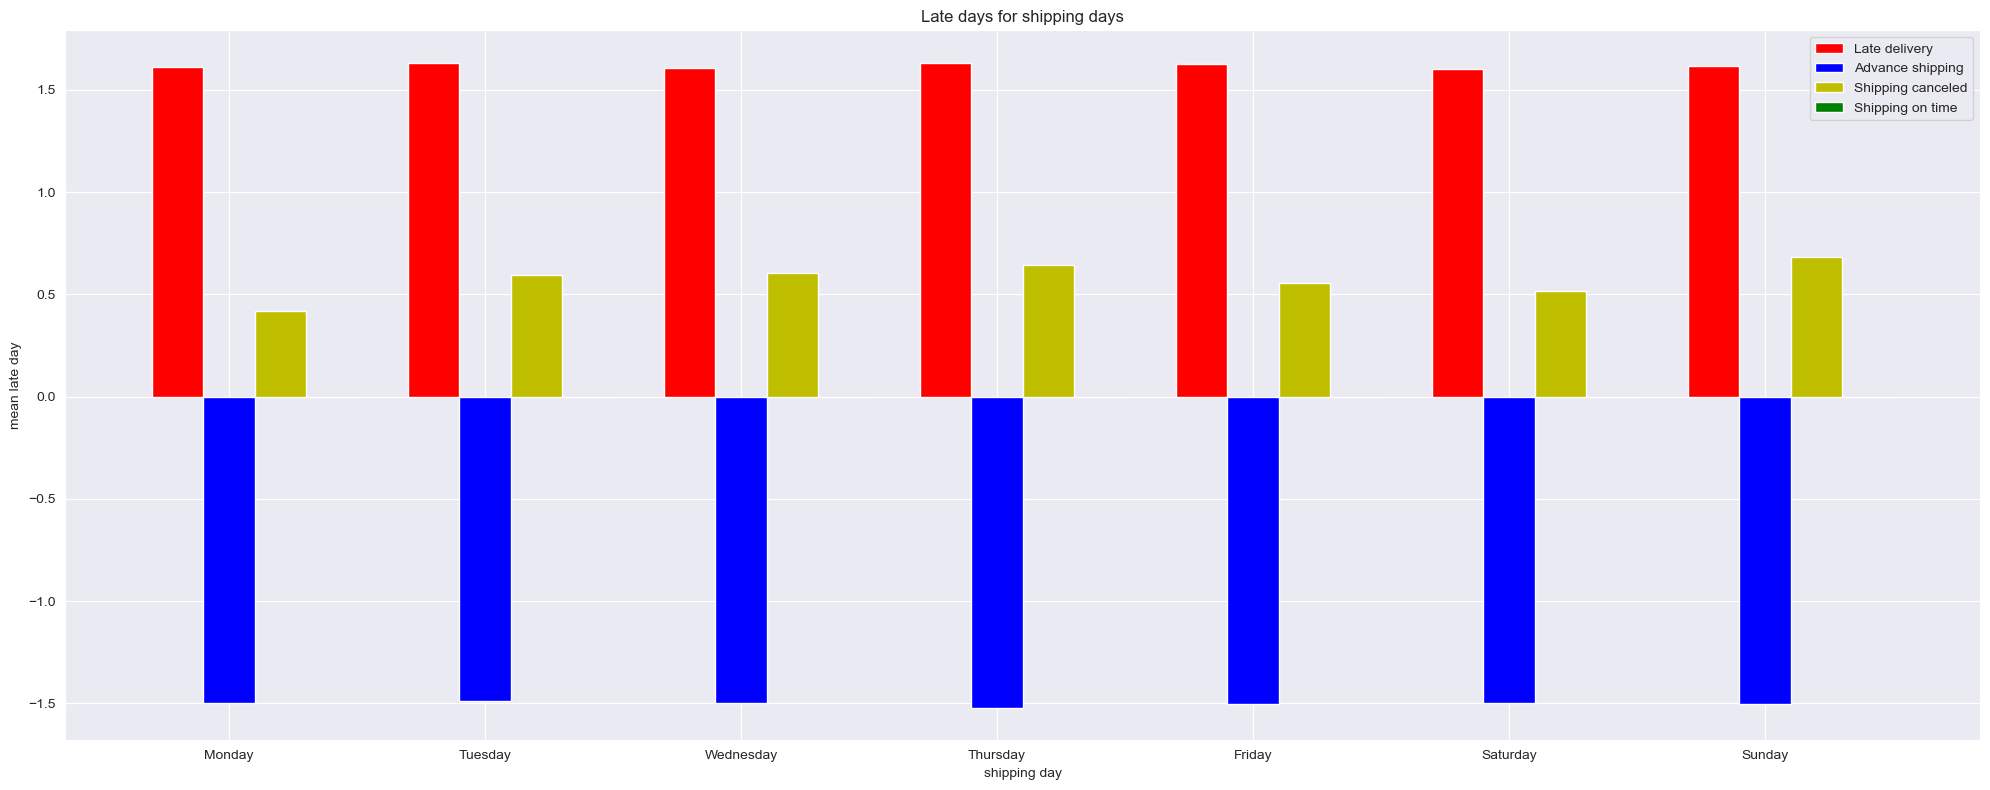

In [339]:
#Shipping Date Late Delivery
#Filtering four delivery status
stat1 = dataframe[(dataframe['Delivery Status'] == 'Late delivery')]
stat2 = dataframe[(dataframe['Delivery Status'] == 'Advance shipping')]
stat3 = dataframe[(dataframe['Delivery Status'] == 'Shipping on time')]
stat4 = dataframe[(dataframe['Delivery Status'] == 'Shipping canceled')]

#Filtering seven shipping days
listday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
count1=[]
count2=[]
count3=[]
count4=[]

for i in listday:
    numcol=listday.index(i)
    statday1=stat1[(stat1['shipping_day'] == i)]
    count1.append(statday1['late_days'].mean())
    
    statday2=stat2[(stat2['shipping_day'] == i)]
    count2.append(statday2['late_days'].mean())
    
    statday3=stat3[(stat3['shipping_day'] == i)]
    count3.append(statday3['late_days'].mean())
    
    statday4=stat4[(stat4['shipping_day'] == i)]
    count4.append(statday4['late_days'].mean())

#mean late days per shipping day and delivery status    
display(count1)
display(count2)
display(count3)
display(count4)    
    
#Index names
#names=dataframe['shipping_day'].value_counts().keys()
#display(names)
names=listday
n_groups=7
index=np.arange(n_groups)
bar_width=0.2

fig,ax = plt.subplots(figsize=(20,8))

type1=plt.bar(index, count1, bar_width, color='r', label='Late delivery')
type2=plt.bar(index+bar_width, count2, bar_width, color='b', label='Advance shipping')
type4=plt.bar(index+bar_width+bar_width, count4, bar_width, color='y', label='Shipping canceled')
type3=plt.bar(index+bar_width+bar_width+bar_width, count3, bar_width, color='g', label='Shipping on time')

plt.xlabel('shipping day')
plt.ylabel('mean late day')
plt.title('Late days for shipping days')
plt.legend()
plt.xticks(index+bar_width, names)
plt.tight_layout()
plt.show()



<r><span style="color:red"> INSIGHTS:   </span> Looking at the average late days, Tuesdays are a little more affected by delays.
    

<span style="color:blue">2.3- Which month do we have more late delivery?</span>

[1.6199575371549895,
 1.6611295681063123,
 1.5975734210227917,
 1.6552921455938698,
 1.581550494593973,
 1.6283396946564885,
 1.6195639635482755,
 1.6174311926605505,
 1.6129069632719268,
 1.5920547945205479,
 1.6471714790807308,
 1.5861727696875443]

[-1.5089675230247213,
 -1.5067144136078783,
 -1.4908194025760482,
 -1.4879054425508522,
 -1.4907199100112485,
 -1.4881530117042534,
 -1.5145317545748116,
 -1.5113979675913212,
 -1.5146361862280457,
 -1.4960500329163924,
 -1.5043508527671423,
 -1.507206588881263]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.6129518072289156,
 0.45988538681948427,
 0.6215384615384615,
 0.514018691588785,
 0.5555555555555556,
 0.5049365303244006,
 0.7215909090909091,
 0.5961844197138315,
 0.5438335809806835,
 0.5841209829867675,
 0.44871794871794873,
 0.7238805970149254]

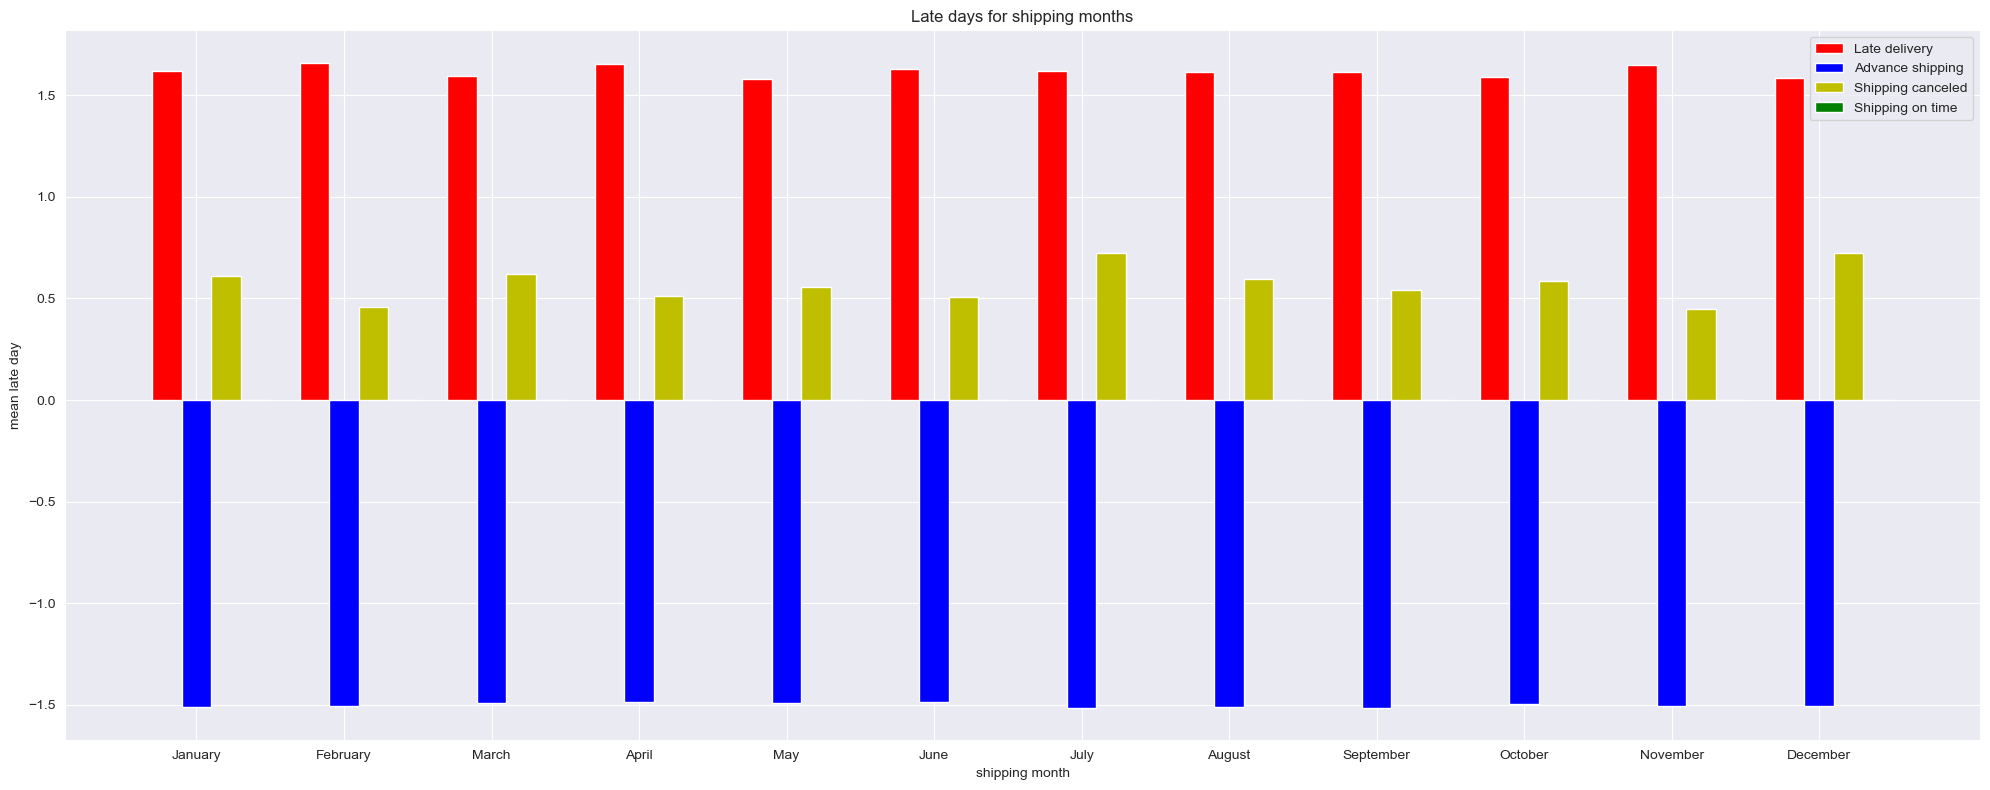

In [344]:
#Shipping Date Late Delivery
#Filtering four delivery status
stat1 = dataframe[(dataframe['Delivery Status'] == 'Late delivery')]
stat2 = dataframe[(dataframe['Delivery Status'] == 'Advance shipping')]
stat3 = dataframe[(dataframe['Delivery Status'] == 'Shipping on time')]
stat4 = dataframe[(dataframe['Delivery Status'] == 'Shipping canceled')]

#Filtering seven shipping days
listmonth=['January','February','March','April','May','June','July','August', 'September','October','November','December']
countm1=[]
countm2=[]
countm3=[]
countm4=[]

for i in listmonth:
    numcol=listmonth.index(i)
    statmonth1=stat1[(stat1['shipping_month'] == i)]
    countm1.append(statmonth1['late_days'].mean())
    
    statmonth2=stat2[(stat2['shipping_month'] == i)]
    countm2.append(statmonth2['late_days'].mean())
    
    statmonth3=stat3[(stat3['shipping_month'] == i)]
    countm3.append(statmonth3['late_days'].mean())
    
    statmonth4=stat4[(stat4['shipping_month'] == i)]
    countm4.append(statmonth4['late_days'].mean())

#mean late days per shipping day and delivery status    
display(countm1)
display(countm2)
display(countm3)
display(countm4)    
    
#Index names
#names=dataframe['shipping_day'].value_counts().keys()
#display(names)
names=listmonth
n_groups=12
index=np.arange(n_groups)
bar_width=0.2

fig,ax = plt.subplots(figsize=(20,8))

type1=plt.bar(index, countm1, bar_width, color='r', label='Late delivery')
type2=plt.bar(index+bar_width, countm2, bar_width, color='b', label='Advance shipping')
type4=plt.bar(index+bar_width+bar_width, countm4, bar_width, color='y', label='Shipping canceled')
type3=plt.bar(index+bar_width+bar_width+bar_width, countm3, bar_width, color='g', label='Shipping on time')

plt.xlabel('shipping month')
plt.ylabel('mean late day')
plt.title('Late days for shipping months')
plt.legend()
plt.xticks(index+bar_width, names)
plt.tight_layout()
plt.show()


<r><span style="color:red"> INSIGHTS:   </span> Looking at the average late days, February is a little more affected by delays followed by April.
   

<span style="color:blue">2.4- Order date and late delivery</span>

In [357]:
#Order Date Late Delivery

ordershipdate = dataframe[(dataframe['Delivery Status'] == 'Late delivery')]
#display(ordershipdate[["order_date_dateorders","shipping_date_dateorders"]])

display(dataframe[["order_date_dateorders","shipping_date_dateorders", "Days for shipping (real)", "Days for shipment (scheduled)", "late_days"]])



,order_date_dateorders,shipping_date_dateorders,Days for shipping (real),Days for shipment (scheduled),late_days
0,2018-01-31 22:56:00,2018-02-03 22:56:00,3,4,-1
1,2018-01-13 12:27:00,2018-01-18 12:27:00,5,4,1
2,2018-01-13 12:06:00,2018-01-17 12:06:00,4,4,0
3,2018-01-13 11:45:00,2018-01-16 11:45:00,3,4,-1
4,2018-01-13 11:24:00,2018-01-15 11:24:00,2,4,-2
...,...,...,...,...,...
180514,2016-01-16 03:40:00,2016-01-20 03:40:00,4,4,0
180515,2016-01-16 01:34:00,2016-01-19 01:34:00,3,2,1
180516,2016-01-15 21:00:00,2016-01-20 21:00:00,5,4,1
180517,2016-01-15 20:18:00,2016-01-18 20:18:00,3,4,-1


<span style="color:blue">-> WHERE?</span>

<span style="color:blue">3.1- Which Region has the most late delivery?</span>


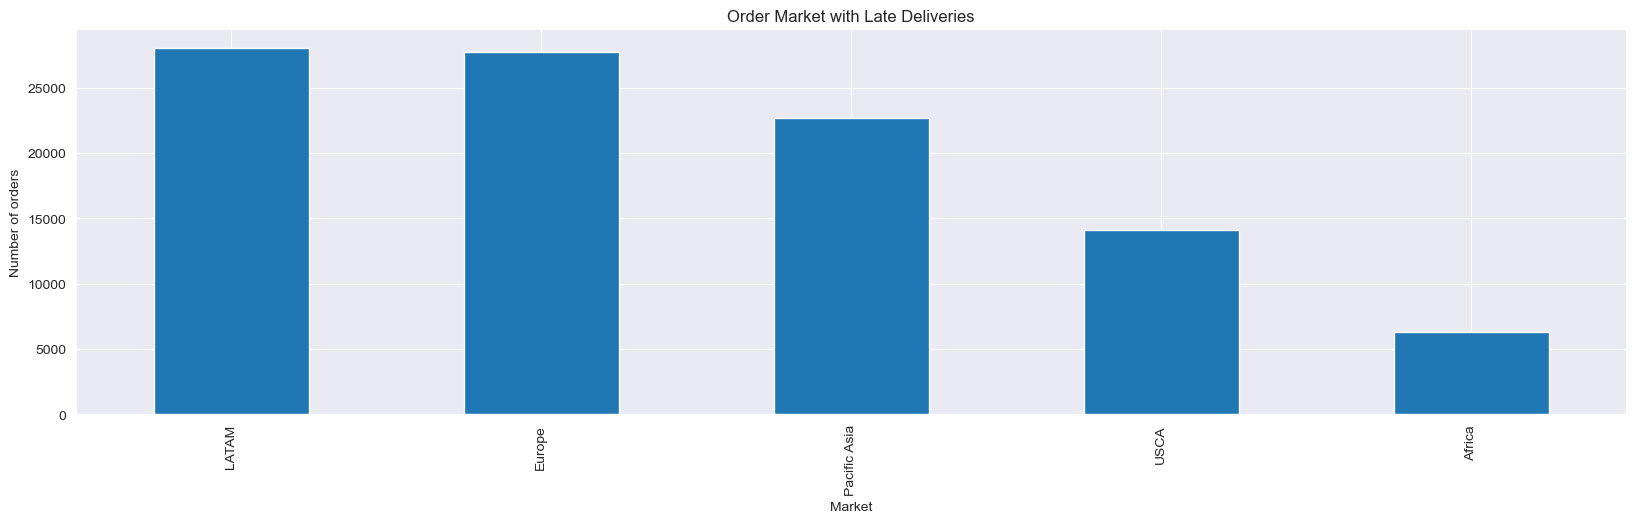

In [828]:
#Order Market Late Delivery
market_late=dataframe[dataframe["Delivery Status"]=="Late delivery"]
#market_late["Market"].value_counts()
market_late["Market"].value_counts().plot.bar(title="Order Market with Late Deliveries")

plt.xlabel('Market')
plt.ylabel('Number of orders')
plt.show()


<span style="color:blue">3.2- Which region has the most late delivery? and what is the risk ?</span>


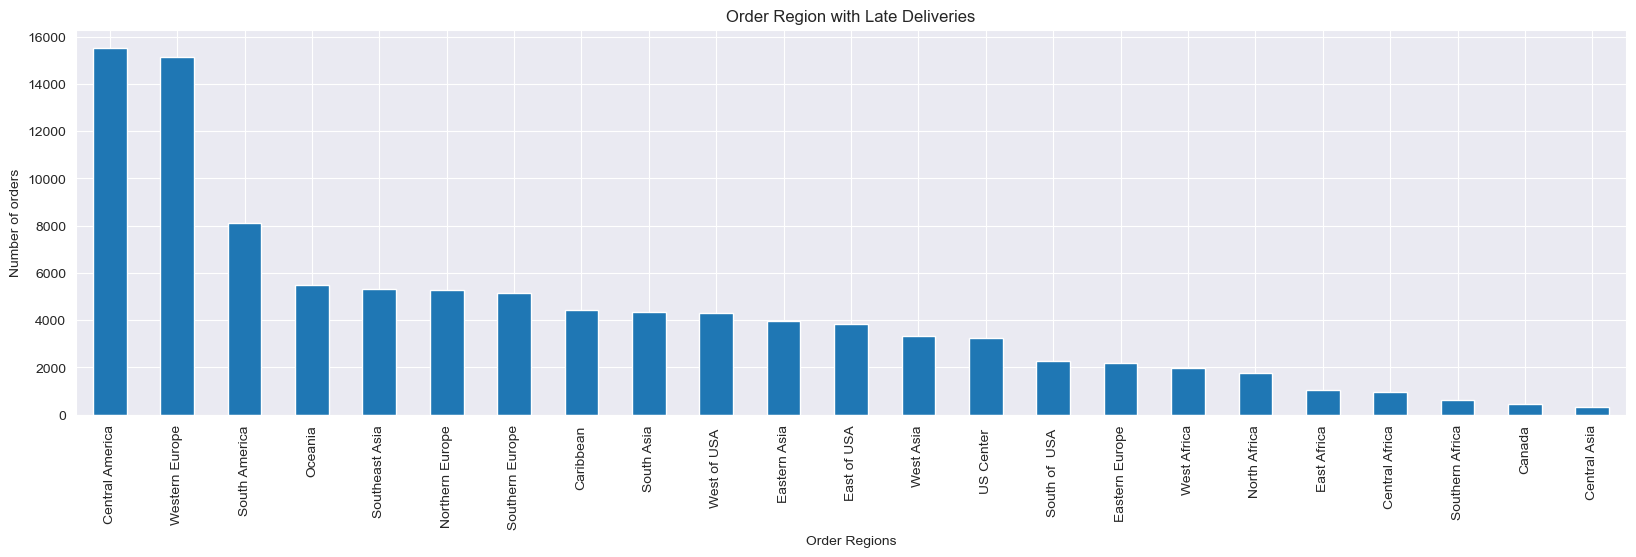

In [247]:
#Order Region Late delivery
region_late=dataframe[dataframe["Delivery Status"]=="Late delivery"]
#region_late["Order Region"].value_counts()
region_late["Order Region"].value_counts().plot.bar(title="Order Region with Late Deliveries")

plt.xlabel('Order Regions')
plt.ylabel('Number of orders')
plt.show()


<r><span style="color:red"> INSIGHTS:   </span>
For some orders RISK of late delivery is given in data. Let's compare Orders with late delivery RISK with late delivered orders.

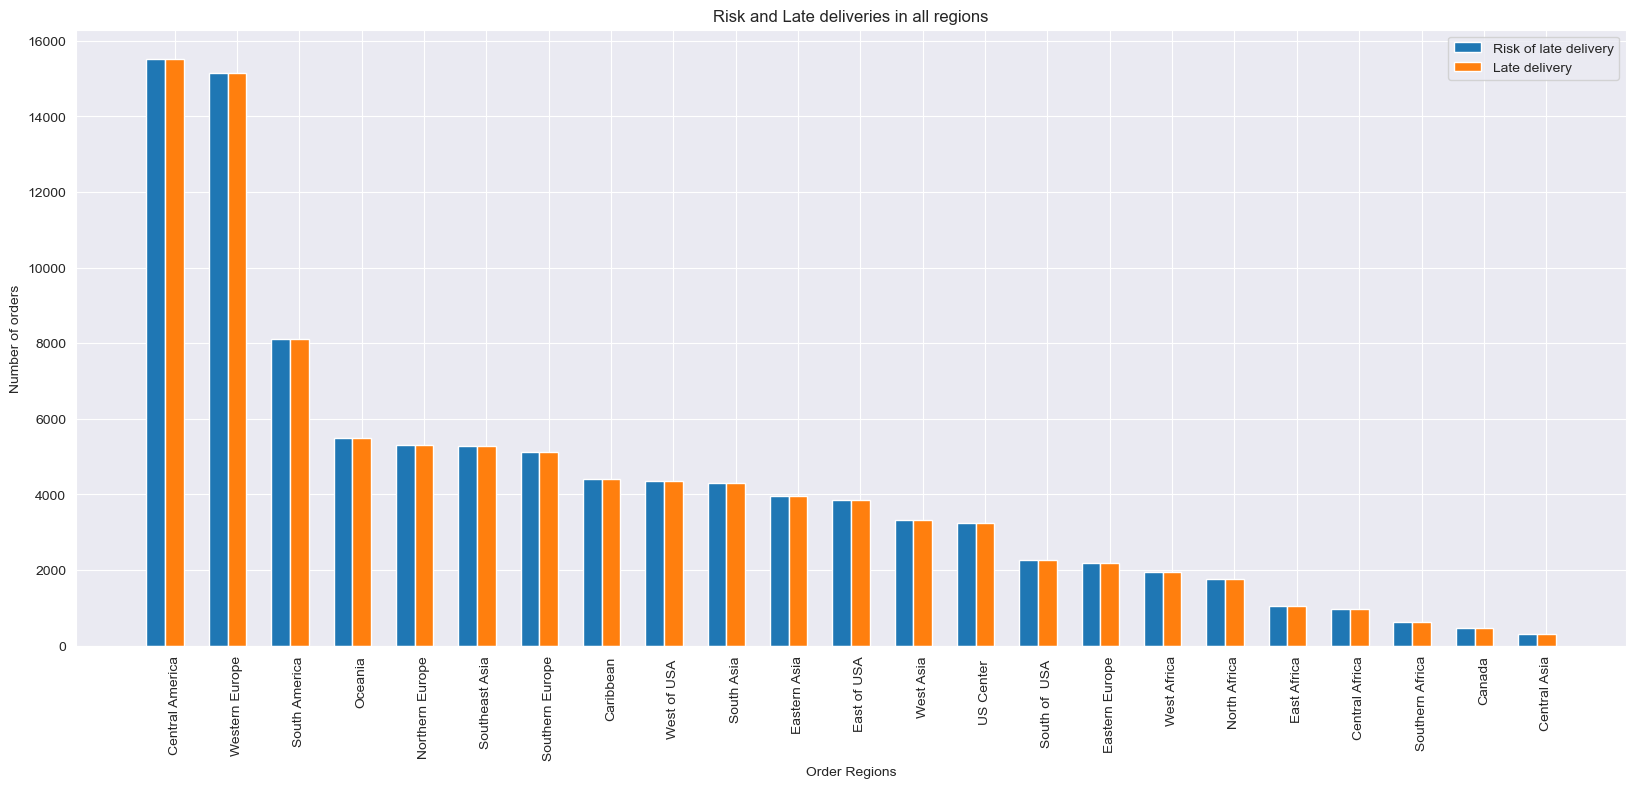

In [248]:
#Filtering orders with late delivery risk
risk = dataframe[(dataframe['Late_delivery_risk'] == 1)]
#Filtering late delivered orders
late = dataframe[(dataframe['Delivery Status'] == 'Late delivery')]

count1=risk['Order Region'].value_counts()
count2=late['Order Region'].value_counts()

#Index names
names=dataframe['Order Region'].value_counts().keys()
index=np.arange(23)
bar_width=0.3

fig,ax = plt.subplots(figsize=(20,8)) #Figure size

type1=plt.bar(names, count1, bar_width, label='Risk of late delivery')
type2=plt.bar(index+bar_width, count2, bar_width, label='Late delivery')

plt.xlabel('Order Regions')
plt.ylabel('Number of orders')
plt.title('Risk and Late deliveries in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)

plt.show()


<r><span style="color:red"> INSIGHTS:  </span> For all the products with late delivery RISK, the product is actually being delivered late. To avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them.

<span style="color:blue">3.3- What are the top 10 customer city with the most late delivery?</span>

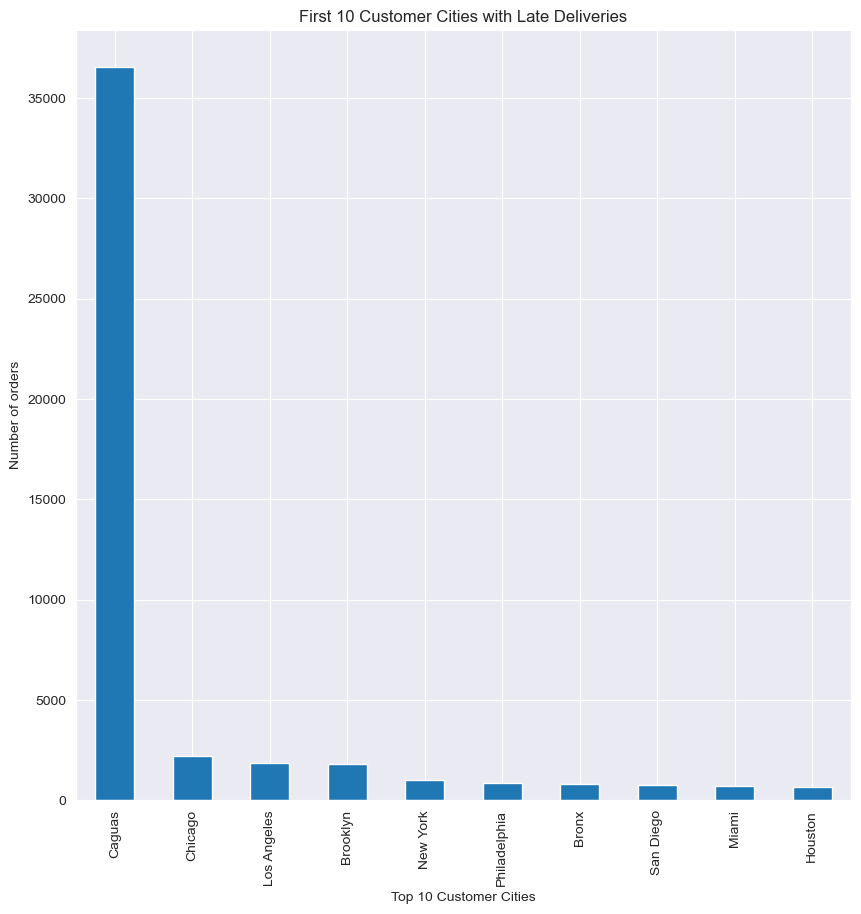

In [249]:
#Customer City Late delivery
#City_Late = dataframe.loc[dataframe["Delivery Status"] == "Late delivery", ["Customer City"]]
City_Late=dataframe[dataframe["Delivery Status"]=="Late delivery"]
plt.figure(figsize=(10,10))

#sns.countplot(x="Customer City", data=City_Late, order=City_Late['Customer City'].value_counts().sort_values(ascending=False).head(50).index)
#plt.xticks(rotation='vertical')
#plt.title('Cities delivered Late')
#plt.ylabel('Count')
#plt.xlabel('Customer City')
#plt.show()

City_Late["Customer City"].value_counts().sort_values(ascending=False).head(10).plot.bar(title="First 10 Customer Cities with Late Deliveries")

plt.xlabel('Top 10 Customer Cities')
plt.ylabel('Number of orders')
plt.show()


<span style="color:blue">-> WHAT?</span>

<span style="color:blue">4.1- What are the top 20 category product with the most late delivery?</span>

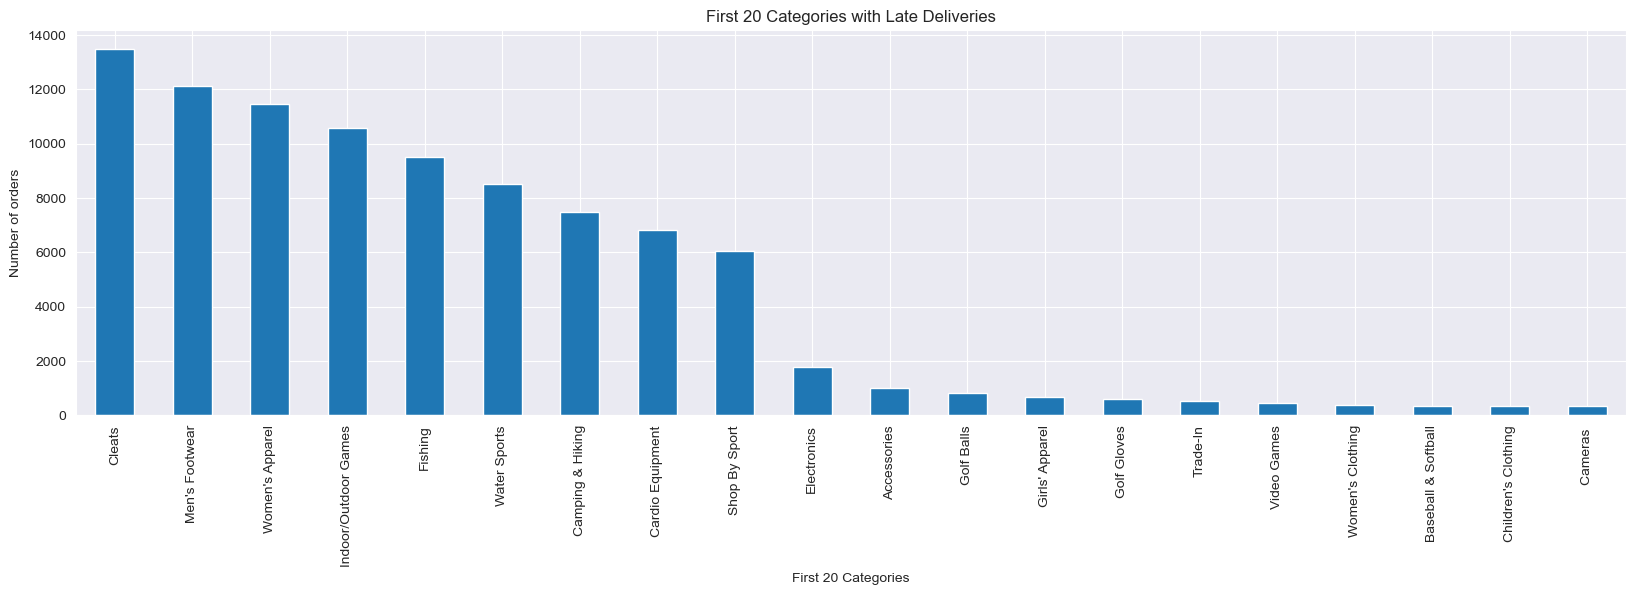

In [250]:
#Category Late delivery
#Category_Late = dataframe.loc[dataframe["Delivery Status"] == "Late delivery", ["Category Name"]]
Category_Late=dataframe[dataframe["Delivery Status"]=="Late delivery"]
#plt.figure(figsize=(10,10))

#sns.countplot(x="Category Name", data=Category_Late, order=Category_Late['Category Name'].value_counts().sort_values(ascending=False).index)
#plt.xticks(rotation='vertical')
#plt.title('Categories delivered Late')
#plt.ylabel('Count')
#plt.xlabel('Category Name')
#plt.show()

Category_Late["Category Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(title="First 20 Categories with Late Deliveries")

plt.xlabel('First 20 Categories')
plt.ylabel('Number of orders')
plt.show()


<r><span style="color:red"> INSIGHTS:  </span> Orders with Cleats Category is getting delayed the most followed by Men's Footwear. 

<span style="color:blue">4.2- What are the department store with the most late delivery?</span>

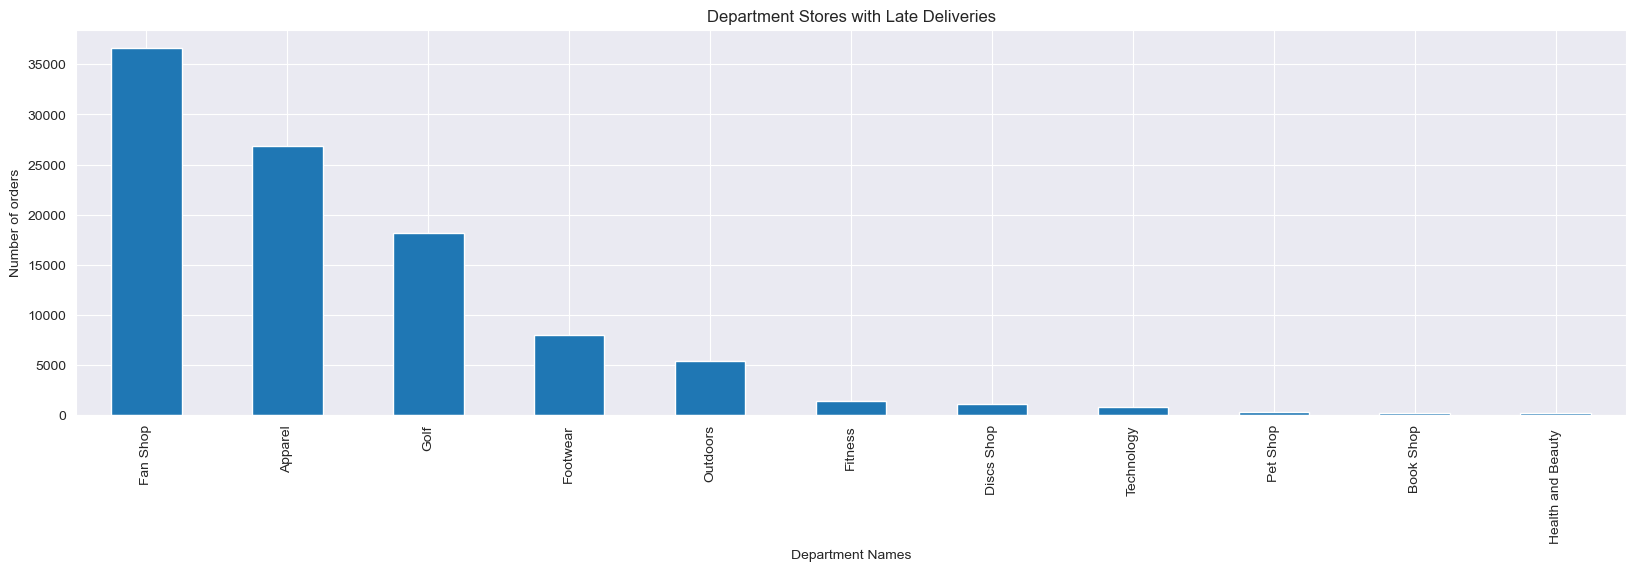

In [251]:
#Store Department Late Delivery
Storedept_Late=dataframe[dataframe["Delivery Status"]=="Late delivery"]
Storedept_Late["Department Name"].value_counts().sort_values(ascending=False).plot.bar(title="Department Stores with Late Deliveries")

plt.xlabel('Department Names')
plt.ylabel('Number of orders')
plt.show()


<r><span style="color:red"> INSIGHTS:  </span>  It will be interesting to see the number of orders for different status in all department.

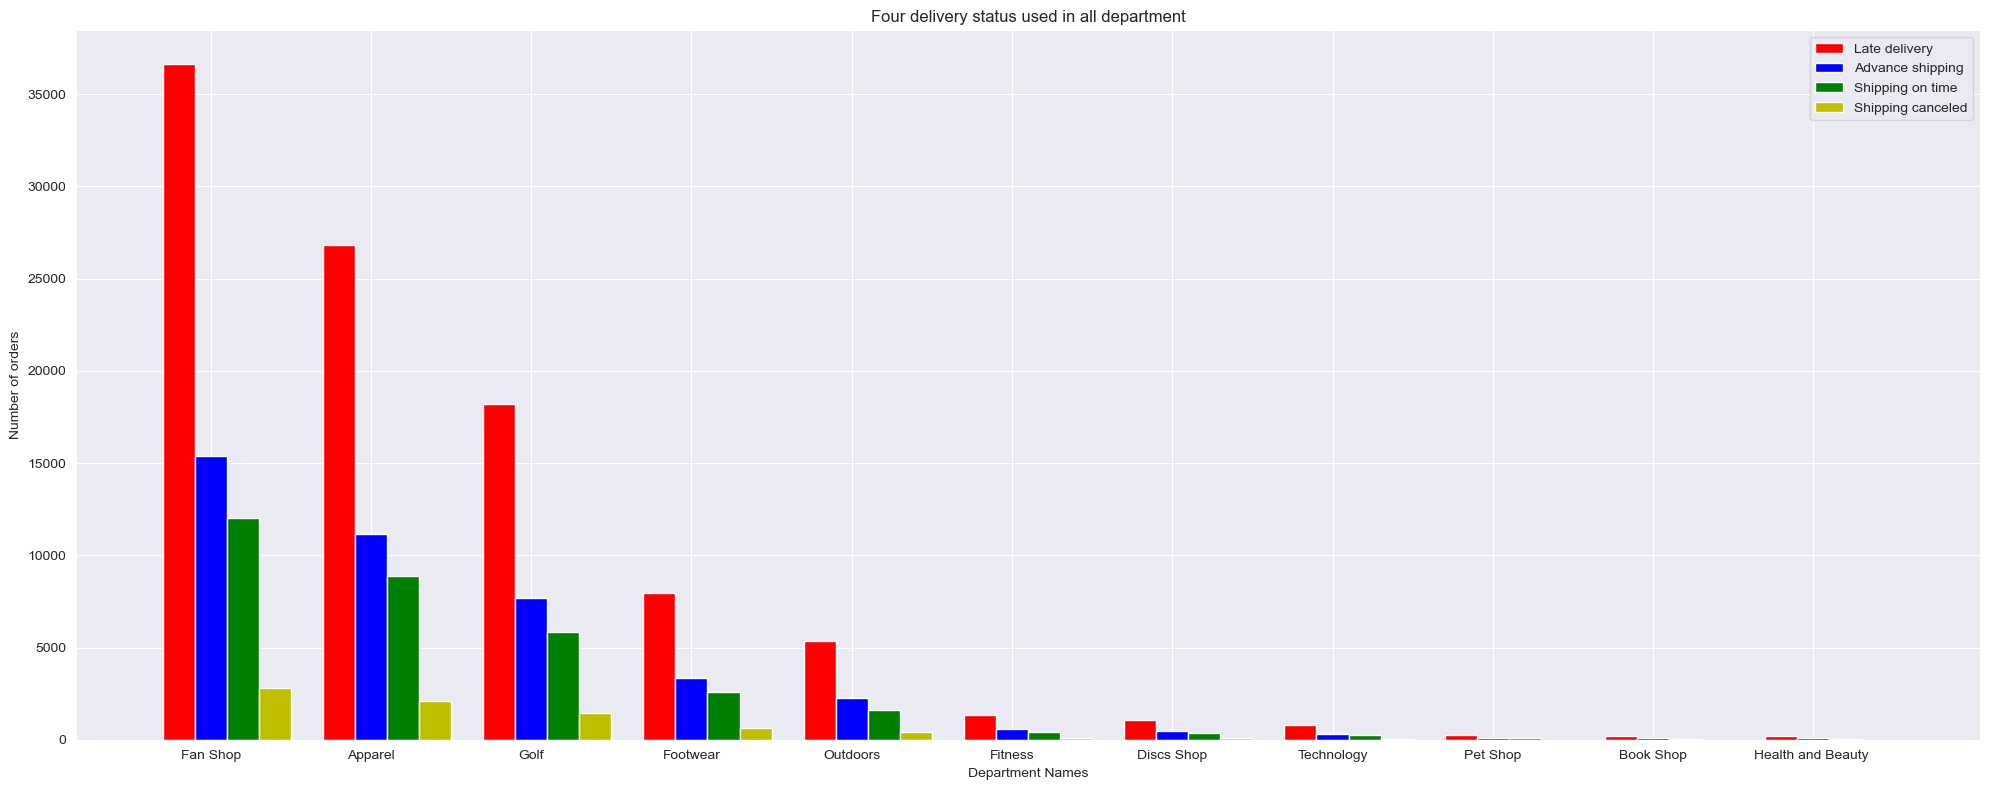

In [252]:
#Filtering four delivery status
stat1 = dataframe[(dataframe['Delivery Status'] == 'Late delivery')]
stat2 = dataframe[(dataframe['Delivery Status'] == 'Advance shipping')]
stat3 = dataframe[(dataframe['Delivery Status'] == 'Shipping on time')]
stat4 = dataframe[(dataframe['Delivery Status'] == 'Shipping canceled')]

#Counting total values
count1=stat1['Department Name'].value_counts()
count2=stat2['Department Name'].value_counts()
count3=stat3['Department Name'].value_counts()
count4=stat4['Department Name'].value_counts()

#Index names
names=dataframe['Department Name'].value_counts().keys()
n_groups=11
index=np.arange(n_groups)
bar_width=0.2

fig,ax = plt.subplots(figsize=(20,8))

type1=plt.bar(index, count1, bar_width, color='r', label='Late delivery')
type2=plt.bar(index+bar_width, count2, bar_width, color='b', label='Advance shipping')
type3=plt.bar(index+bar_width+bar_width, count3, bar_width, color='g', label='Shipping on time')
type4=plt.bar(index+bar_width+bar_width+bar_width, count4, bar_width, color='y', label='Shipping canceled')

plt.xlabel('Department Names')
plt.ylabel('Number of orders')
plt.title('Four delivery status used in all department')
plt.legend()
plt.xticks(index+bar_width, names)
plt.tight_layout()
plt.show()


<r><span style="color:red"> INSIGHTS:  </span>  For all departments, there are twice more Late deliveries than Advance or On time deliveries.



<h3>Now that we have a general sense of the data by comparing different features, all these variables studied from the descriptive analysis will be used as input variable to create a model. Taking into account the model accuracy, we should be able to predict an order tardiness.
</h3>

## <span style="color:blue">Inferential Statistics</span>


<span style="color:blue">-> Heatmap</span>

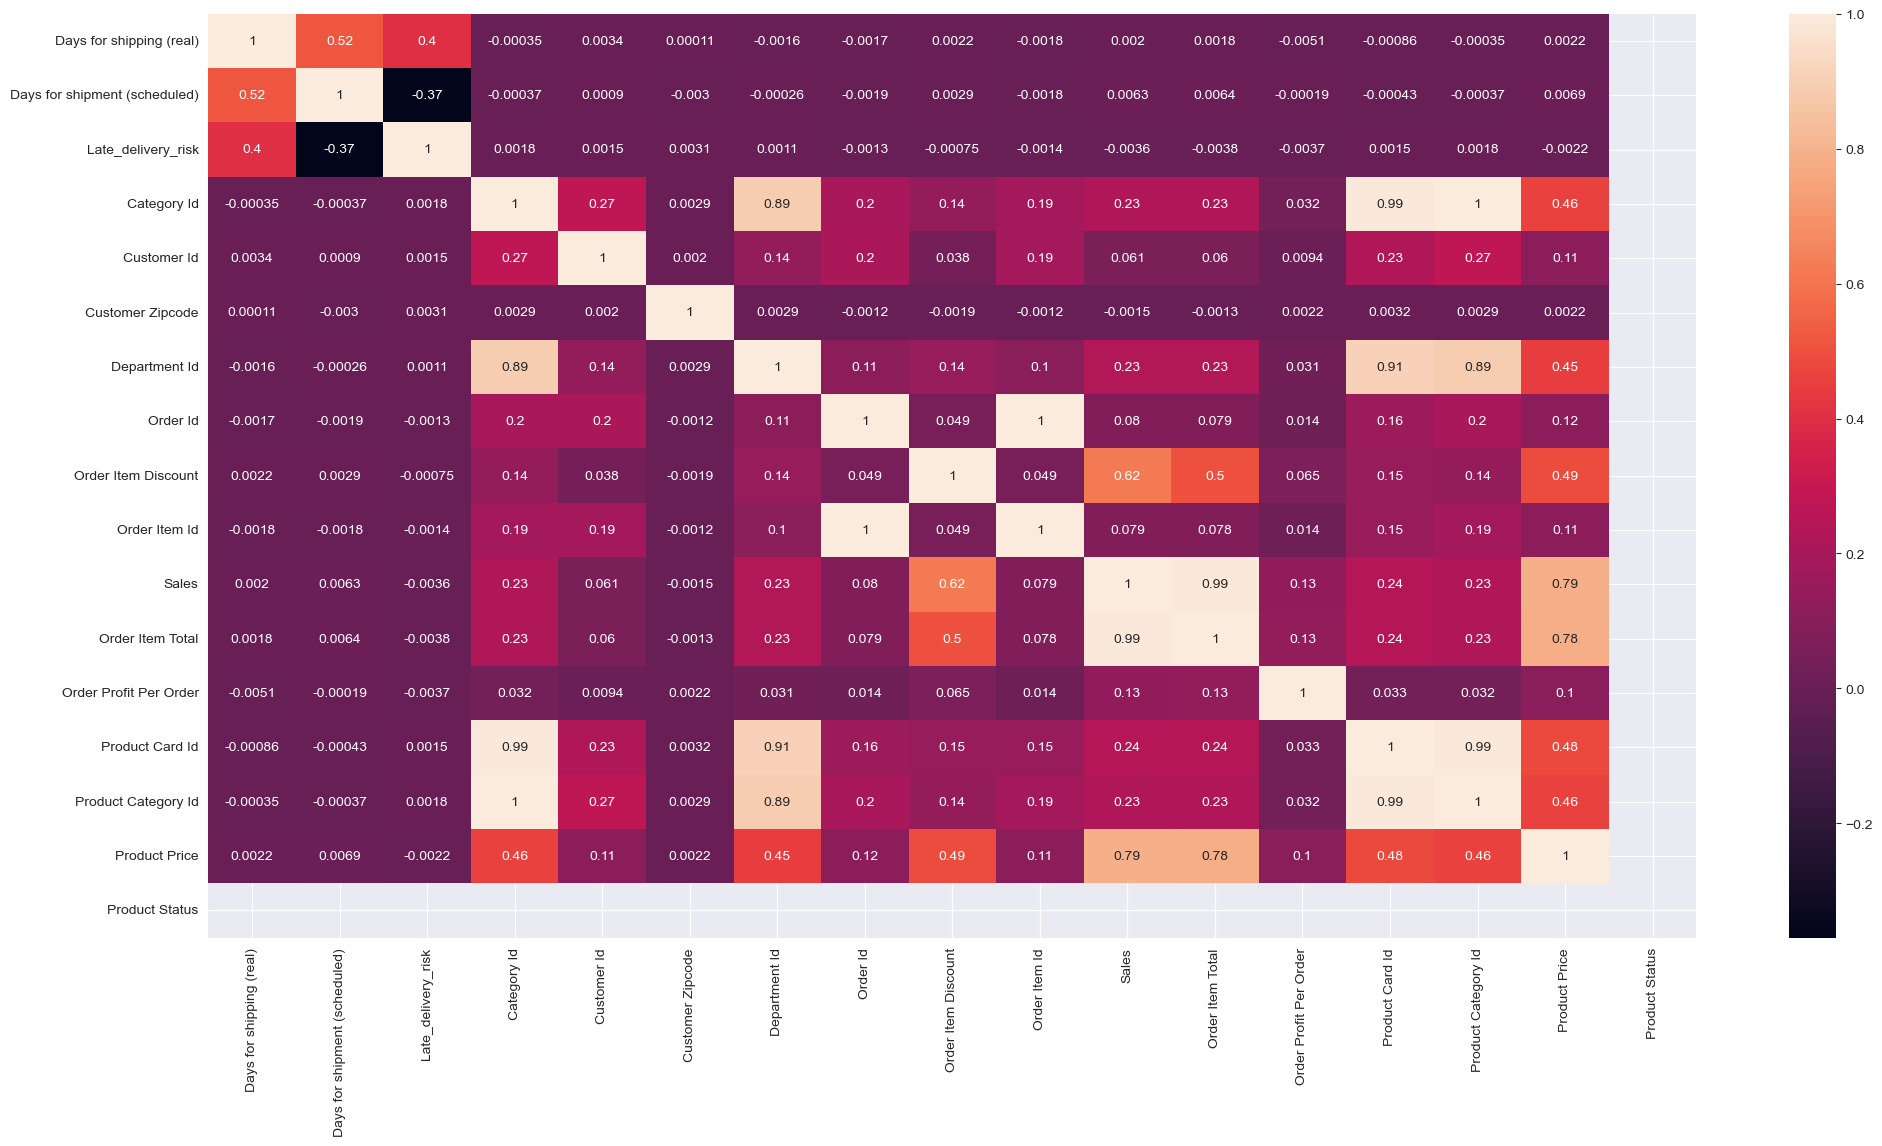

In [840]:
#Correlation matrice
#Check the type of variables in the dataframe
#because models can only be trained with numerical values.
data=pd.read_csv("DataCoSupplyChainDataset.csv",encoding='ISO-8859-1')

data=data.drop(['Customer Email','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode',
            'Benefit per order', 'Sales per customer','Order Customer Id','Order Item Cardprod Id', 'Order Item Discount Rate',
               'Order Item Product Price', 'Order Item Profit Ratio','Order Item Quantity'],axis=1)
#data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

fig, ax = plt.subplots(figsize=(24,12))         
correlated_dataframe = data.corr(numeric_only = True)
sns.heatmap(correlated_dataframe, annot=True)

plt.show()



Insights from Heatmap:  

-> Columns that are similar with same values: duplicate columns

[Benefit per order] with [Order Profit Per Order]  
[Sales per customer] with [Sales], [Order Item Total]  
[Category ID] with [Product Category Id], [Order Item Cardprod Id], [Product Card Id]  
[Customer ID] with [Order Customer Id]  
[Order Item Product Price] with [Product Price]  
[Order Id] with [Order Item Id]  
[Order Item Cardprod Id] with [Product Category Id], [Product Card Id]  
[Sales] with [Order Item Total]  
[Product Card Id] with [Product Category Id]
  
->Unwanted features: null

[Product Description], [Product Status]

<span style="color:blue">-> Models</span>

In [924]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc

train_data=pd.read_csv("DataCoSupplyChainDataset.csv",encoding='ISO-8859-1')

train_data['Customer Full Name'] = train_data['Customer Fname'].astype(str)+train_data['Customer Lname'].astype(str)

#####
train_data=train_data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
#train_data=train_data.drop(['Product Status','Customer Email','Customer Password','Customer Street','Customer Fname','Customer Lname',
#           'Product Description','Order Zipcode','Product Image','Latitude','Longitude'],axis=1)


train_data['Customer Zipcode']=train_data['Customer Zipcode'].fillna(0)
train_data['order_year']= pd.DatetimeIndex(train_data['order date (DateOrders)']).year
train_data['order_month'] = pd.DatetimeIndex(train_data['order date (DateOrders)']).month
#train_data['order_hour'] = pd.DatetimeIndex(train_data['order date (DateOrders)']).hour
train_data['TotalPrice'] = train_data['Order Item Quantity'] * train_data['Order Item Total']

#One new column is created for orders with late delivery making them into binary classification, 
#which in turn helps to measure performance of different models better.
#train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

#To measure models accurately all the columns with repeated values are dropped 
#like late_delivery_risk column because, it is known all the products with late delivery risk 
#are delivered late. 

train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)
#train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','Days for shipping (real)',
#                 'Days for shipment (scheduled)','shipping date (DateOrders)','order date (DateOrders)'], axis=1, inplace=True)


#It is important to check the type of variables in the data 
#because models can only be trained with numerical values.

#There are some columns with object type data which cannot be trained in models
#so all the object type data is converted to int type using preprocessing label encoder library.
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])


#display the initial records
#train_data.head()

#KEEP 121 random rows for final prediction 
#Number total of rows 180519
step = range(0,180519,1500)
display(step)
topredict = train_data.iloc[step]
display(topredict["late_delivery"])
train_data.drop(axis=0, index=step, inplace=True)

#All columns except late_delivery
xl = train_data.loc[:, train_data.columns != 'late_delivery']
#Only late_delivery column
yl = train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size = 0.2, random_state = 42)



range(0, 180519, 1500)

0         0
1500      1
3000      1
4500      1
6000      1
         ..
174000    1
175500    1
177000    0
178500    1
180000    0
Name: late_delivery, Length: 121, dtype: int64

In [925]:
def fmodel(model_l, xl_train, xl_test, yl_train, yl_test):
    model_l = model_l.fit(xl_train, yl_train) 
    yl_pred = model_l.predict(xl_test)  
    
    accuracy_l = accuracy_score(yl_pred, yl_test) 
    recall_l = recall_score(yl_pred, yl_test)
    conf_l = confusion_matrix(yl_test, yl_pred)
    f1_l = f1_score(yl_test, yl_pred)
    
    print('Model parameters:  ',model_l)
    print('Accuracy of late delivery status:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status:', (recall_l)*100,'%')
    print('Confusion Matrix of late delivery status: \n',(conf_l))
    print('F1 score of late delivery status:', (f1_l)*100,'%')
    print("\n")

#Define the model and give data to the model (via the function)
sc = StandardScaler()
xl_trainLR = sc.fit_transform(xl_train)
xl_testLR = sc.transform(xl_test)
model_l = LogisticRegression(solver='lbfgs',random_state=0, max_iter=200 ) 
fmodel(model_l, xl_trainLR, xl_testLR, yl_train, yl_test) 

model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
fmodel(model_l, xl_train, xl_test, yl_train, yl_test)

model_l = tree.DecisionTreeClassifier()
fmodel(model_l, xl_train, xl_test, yl_train, yl_test)



Model parameters:   LogisticRegression(max_iter=200, random_state=0)
Accuracy of late delivery status: 97.60809312638581 %
Recall score of late delivery status: 95.83715209107135 %
Confusion Matrix of late delivery status: 
 [[15349   863]
 [    0 19868]]
F1 score of late delivery status: 97.87433188009558 %


Model parameters:   RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status: 97.59423503325942 %
Recall score of late delivery status: 95.81404320987654 %
Confusion Matrix of late delivery status: 
 [[15344   868]
 [    0 19868]]
F1 score of late delivery status: 97.86227957836667 %


Model parameters:   DecisionTreeClassifier()
Accuracy of late delivery status: 98.64190687361419 %
Recall score of late delivery status: 98.88496468213926 %
Confusion Matrix of late delivery status: 
 [[15991   221]
 [  269 19599]]
F1 score of late delivery status: 98.7653698851038 %




Insights:  
  
  Decision Tree classifier is performing better with F1 score of 98.7% for Late Delivery.  
  But the two other models predicted the Late Delivery of orders with almost 97%-98% accuracy.

<span style="color:blue">-> Feature parameters </span>

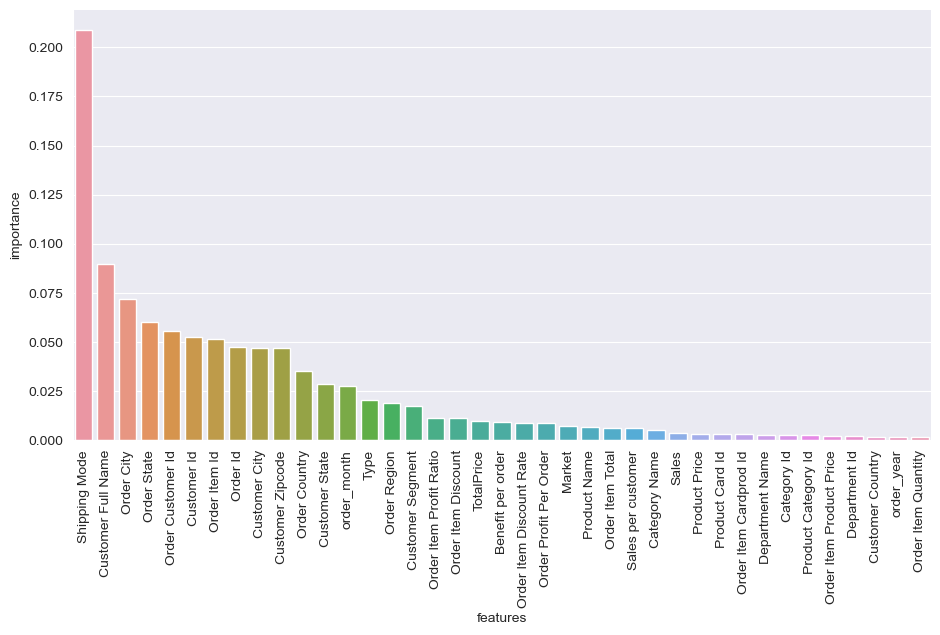

In [922]:
#We use feature importance method from sklearn.
#We want to see which variable are given more importance in the model.

important_column = model_l.feature_importances_.argsort()
feature_important = pd.DataFrame({'features':xl.columns[important_column],'importance':model_l.feature_importances_[important_column]})
feature_important = feature_important.sort_values(by='importance',ascending=False)
  
sns.catplot(x='features', y = 'importance', data=feature_important, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)
plt.show()



Insights:  
  
  The columns for the Days for shipping (real and scheduled) is given a huge importance in this model (0.4-0.5).  
It seems that other important parameters like Shipping Mode, Type or Customer Full Name, Order City and State are also given an importance which could help the company to detect Late Delivery.  
Let's remove these two variables to see which variables is found to be important for prediction of late delivery.  
We will create a new model with the copy of train data.  

In [929]:
#We create a new model with the copy of train data.  
#And we remove the two variables to see which variables is found to be important for prediction of late delivery.  

new_data = train_data
# Dropping columns in new_data
new_data = new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

#All columns except late_delivery
new_xl = new_data.loc[:, new_data.columns != 'late_delivery']
#Only late_delivery column
new_yl = train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
new_xl_train, new_xl_test, new_yl_train, new_yl_test = train_test_split(new_xl, new_yl, test_size = 0.2, random_state = 42)

def fNew_model(model_c, xc_train, xc_test,yc_train, yc_test):
    model_c = model_c.fit(xc_train, yc_train)
    yc_pred = model_c.predict(xc_test) 
    
    accuracy_c = accuracy_score(yc_pred, yc_test)
    recall_c = recall_score(yc_pred, yc_test,average='weighted')
    conf_c = confusion_matrix(yc_test, yc_pred)
    f1_c = f1_score(yc_test, yc_pred,average='weighted')
    print('Model parameters:  ', model_c)
    print('Accuracy:', (round(accuracy_c,4))*100,'%')
    print('Recall score:', (round(recall_c,4))*100,'%')
    print('Confusion Matrix: \n',(conf_c))
    print('F1 score:', (round(f1_c,4))*100,'%')
          

new_model_l = tree.DecisionTreeClassifier()
fNew_model(new_model_l, new_xl_train, new_xl_test, new_yl_train, new_yl_test)



Model parameters:   DecisionTreeClassifier()
Accuracy: 86.33999999999999 %
Recall score: 86.33999999999999 %
Confusion Matrix: 
 [[13762  2450]
 [ 2477 17391]]
F1 score: 86.35000000000001 %


Insights:  
Shipping Days variables are removed and the F1 score and the accuracy of the new model is 86% which is still good (>75%).  
Let's take a look at which variables are given more importance this time?


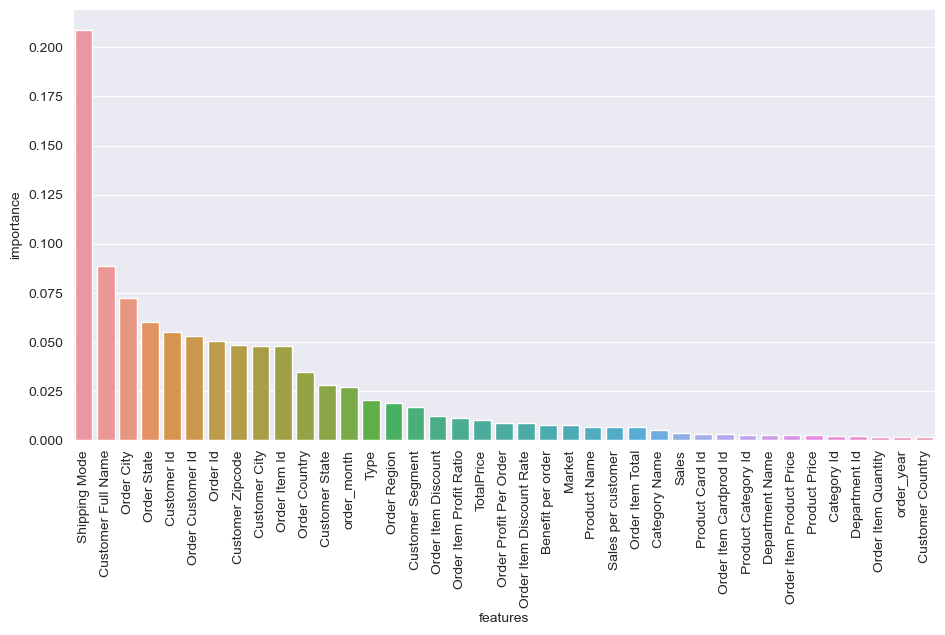

In [857]:
important_column = new_model_l.feature_importances_.argsort()
feature_important = pd.DataFrame({'features':new_xl.columns[important_column],'importance':new_model_l.feature_importances_[important_column]})
feature_important = feature_important.sort_values(by='importance',ascending=False)
sns.catplot(x='features', y = 'importance', data=feature_important, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

plt.show()



Variables like Shipping Mode, Order City and Order State are given more importance.  
It means that company should offer different Shipping methods to deliver products faster.


                                 OLS Regression Results                                
Dep. Variable:          late_delivery   R-squared (uncentered):                   0.623
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              9028.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:19:35   Log-Likelihood:                     -1.1381e+05
No. Observations:              180398   AIC:                                  2.277e+05
Df Residuals:                  180365   BIC:                                  2.280e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

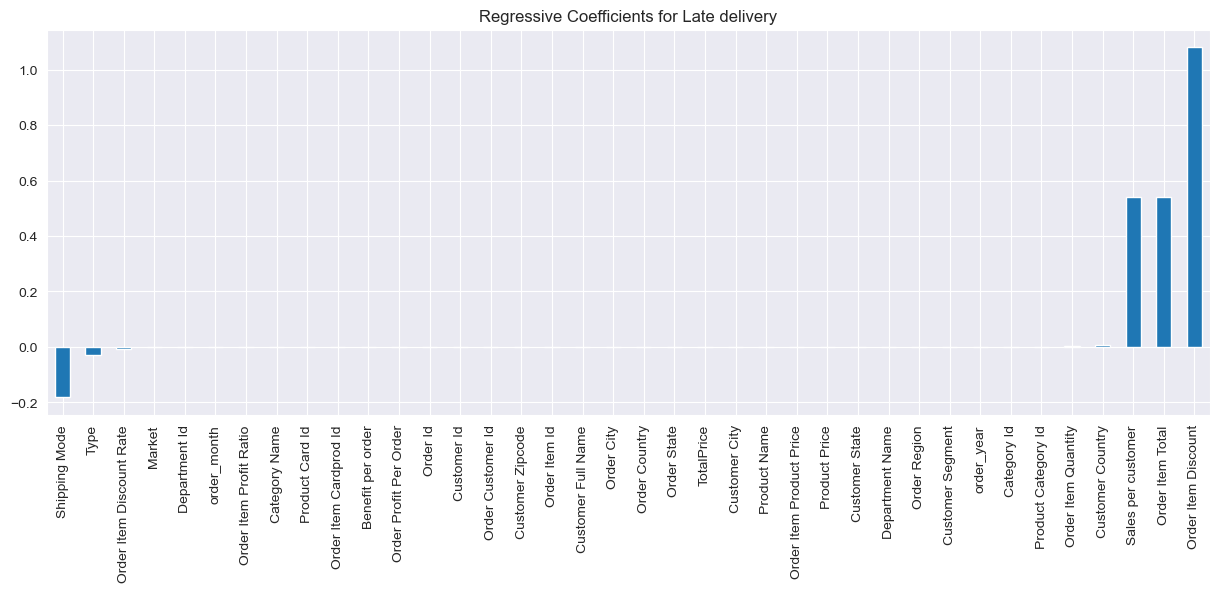

In [824]:
#Let's take a look at what variables are important with the OLS model

independent_variables = new_data.loc[:, new_data.columns != 'late_delivery']
dependent_variables = train_data['late_delivery']
#independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variables,independent_variables).fit() 

print(regression_model.summary())

sort_param = regression_model.params.sort_values()
sort_param =sort_param[1:]
sort_param.plot(kind='bar', title="Regressive Coefficients for Late delivery", figsize=(15, 5), legend=False)

plt.show()



Insights:  
The accuracy of the OLS model is 62% which is quite low.  
But notice that Shipping Mode is already among the parameters ....

<span style="color:blue">-> Use the model to make prediction </span>


In [940]:
#Use the model to make predictions
#Use the 121 rows saved

#topredict = topredict.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

topredict_x = topredict.loc[:, topredict.columns != 'late_delivery']
topredict_y = topredict['late_delivery']

display(new_model_l)
#display(topredict["late_delivery"])
      
predict = pd.DataFrame({'actual' : topredict_y,
                        'predicted' : new_model_l.predict(topredict_x)})

print('NUMBER OF ROWS TESTED: ', len(predict))
i=0
j=0
k=0
for l,r in predict.iterrows():
    if r[0] == r[1]:
        print(predict.index[i], 'actual:', r[0], 'predicted:', r[1], "OK")
        j=j+1
    else: 
        print(predict.index[i], 'actual:', r[0], 'predicted:', r[1], "FALSE")        
        k=k+1
    i=i+1
percent = j/len(predict)*100
print('')
print('ACCURACY: ', (round(percent,4)),'%')
print(k, 'FALSE RESULTS', )

#display(predict.iloc[[68]])




DecisionTreeClassifier()

NUMBER OF ROWS TESTED:  121
0 actual: 0 predicted: 0 OK
1500 actual: 1 predicted: 1 OK
3000 actual: 1 predicted: 1 OK
4500 actual: 1 predicted: 0 FALSE
6000 actual: 1 predicted: 1 OK
7500 actual: 1 predicted: 1 OK
9000 actual: 1 predicted: 1 OK
10500 actual: 0 predicted: 0 OK
12000 actual: 1 predicted: 1 OK
13500 actual: 0 predicted: 0 OK
15000 actual: 1 predicted: 1 OK
16500 actual: 1 predicted: 1 OK
18000 actual: 0 predicted: 0 OK
19500 actual: 1 predicted: 1 OK
21000 actual: 0 predicted: 0 OK
22500 actual: 0 predicted: 0 OK
24000 actual: 1 predicted: 0 FALSE
25500 actual: 1 predicted: 1 OK
27000 actual: 1 predicted: 1 OK
28500 actual: 1 predicted: 1 OK
30000 actual: 1 predicted: 1 OK
31500 actual: 0 predicted: 0 OK
33000 actual: 0 predicted: 0 OK
34500 actual: 1 predicted: 1 OK
36000 actual: 1 predicted: 1 OK
37500 actual: 1 predicted: 1 OK
39000 actual: 1 predicted: 1 OK
40500 actual: 0 predicted: 1 FALSE
42000 actual: 1 predicted: 1 OK
43500 actual: 1 predicted: 1 OK
45000 actual: